In [1]:
# sphinx ignore

import sys

sys.path.append("../..")

%config Completer.use_jedi = False

In [13]:
from gpytorch.likelihoods import BernoulliLikelihood
from gpytorch.mlls import VariationalELBO
from matplotlib import pyplot as plt

from vanguard.classification import BinaryClassification
from vanguard.datasets.classification import BinaryGaussianClassificationDataset
from vanguard.kernels import ScaledRBFKernel
from vanguard.vanilla import GaussianGPController
from vanguard.variational import VariationalInference

In [3]:
DATASET = BinaryGaussianClassificationDataset(num_train_points=10, num_test_points=100)

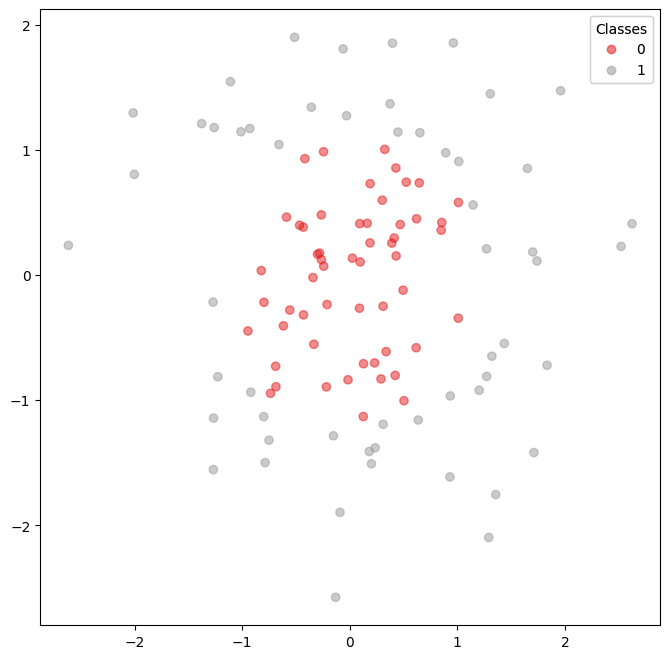

In [4]:
plt.figure(figsize=(8, 8))
DATASET.plot()
plt.show()

In [5]:
@BinaryClassification(ignore_all=True)
@VariationalInference(ignore_all=True)
class BinaryClassifier(GaussianGPController):
    pass

In [6]:
controller = BinaryClassifier(
    DATASET.train_x, 
    DATASET.train_y, 
    kernel_class=ScaledRBFKernel, 
    y_std=0, 
    likelihood_class=BernoulliLikelihood, 
    marginal_log_likelihood_class=VariationalELBO,
)

In [7]:
predictions, probs = controller.classify_points(DATASET.test_x)

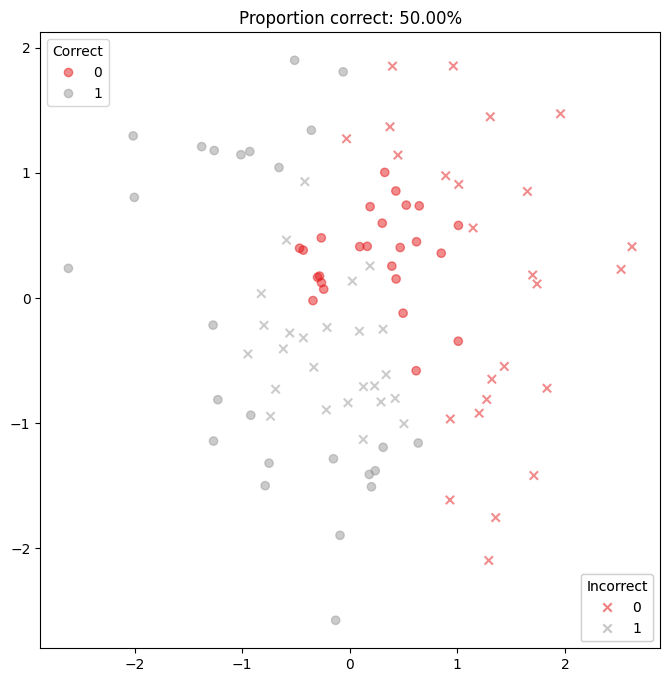

In [8]:
plt.figure(figsize=(8, 8))
DATASET.plot_prediction(predictions)
plt.show()

In [9]:
loss = controller.fit(100)
print(f"Loss: {loss:.5f}")

Loss: 0.69474


In [10]:
predictions, probs = controller.classify_points(DATASET.test_x)

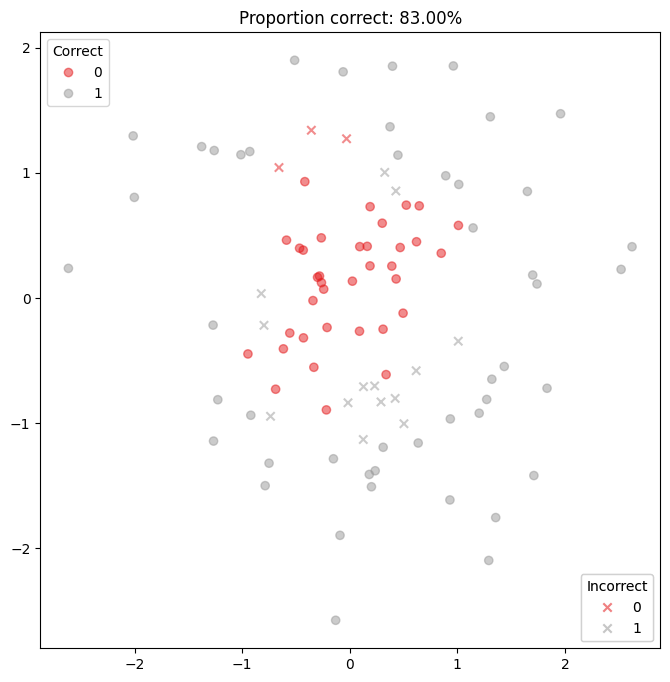

In [11]:
plt.figure(figsize=(8, 8))
DATASET.plot_prediction(predictions)
plt.show()